# 2D Schrodinger Equation solver

### 1. Initialize and set potential

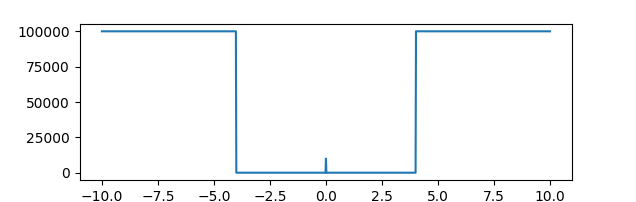

In [6]:
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from matplotlib.animation import FuncAnimation
%matplotlib ipympl


N = 1001
x = np.linspace(-10,10,N)
dx = x[1]-x[0]
dt = 0.001
plt.cla()

def v(x):
    vv = 100000*(np.abs(x)>4)
    vv[N//2] = 10000
    return vv

plt.figure(1, figsize=(7,2))
plt.plot(x, v(x))
plt.show()

### 2. Create Hamiltonian matrix and find eigenstates

In [7]:
def hamiltonian(v):
    d2matrix = np.diag(-2*np.ones(N-2, dtype=np.complex128)) + np.diag(np.ones(N-3),1) + np.diag(np.ones(N-3),-1)
    d2matrix /= dx**2
    vmatrix = np.diag(v(x)[1:-1])
    return -d2matrix + vmatrix
        
H = hamiltonian(v)

t0 = time.time()
e, psi_eigenstate = np.linalg.eigh(H)
print(f"eigenvalues took {time.time()-t0:.2f} s")

psi_eigenstate = np.transpose(psi_eigenstate)
psi_eigenstate = psi_eigenstate / np.sqrt(dx*np.sum(psi_eigenstate**2, axis=0))

eigenvalues took 0.41 s


### 3. Plot

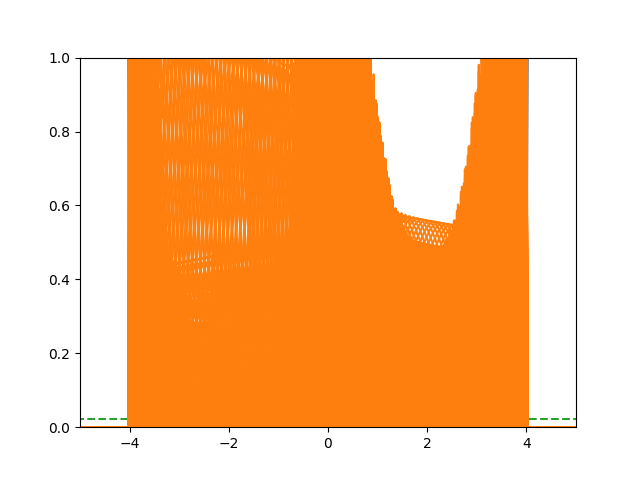

In [8]:
def decompose(f):
    return [np.sum(f*np.conj(p))*dx for p in psi_eigenstate]

def timeEvol(time):
    res = np.zeros(N-2, dtype=np.complex128)
    for i in range(0,N-2):
        res[i] = np.exp(-1j * e[i] * time)
    return res

alpha = 0.1
coherent_coeff = np.zeros(N-2, dtype=np.complex128)
for n in range(10):
    coherent_coeff[n] = alpha**n / np.sqrt(1. * np.math.factorial(n))
coherent_coeff *= np.exp(-np.abs(alpha)**2/2)

# psi = np.dot(coherent_coeff, psi_eigenstate)
psi = np.exp( - 5*(x[1:-1]+2)**2 + 50j * x[1:-1] )
psi /= np.sqrt(np.sum(np.abs(psi)**2 * dx))
psiket = decompose(psi)
# plt.plot(np.abs(psiket))

fig, ax = plt.subplots()
ax.set(xlim=(x[0]/2, x[-1]/2), ylim=(0,1))
artists = []

avg_energy = np.dot(np.abs(psiket)**2, e)
plt.plot([x[0],x[-1]], [avg_energy/np.max(v(x)), avg_energy/np.max(v(x))], 'C2--')
plt.plot(x, v(x)/np.max(v(x)), 'black')
# print(avg_energy / np.max(v(x)))

for i in range(500):
    psiket = timeEvol(dt) * psiket
    psi = np.dot(psiket, psi_eigenstate)
    artists.append(ax.plot(x[1:-1], np.abs(psi)**2, c='C1'))

ani = ArtistAnimation(fig, artists, interval=1000/60, repeat=False, blit=True)
plt.show()
# ani.save("anim.gif")